In [1]:
# All necessary imports
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from common import *
from config import *
from IPython.display import display
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
nypd_data = LOAD_DATASET()

In [44]:
np.random.seed(42)
features = [
    'KY_CD', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 
    'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX'
]
categorical_features = features[1:]
target = 'LAW_CAT_CD'

# First we onehot encode all non-numerical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

# Extract n samples in this case 100k so that it trains faster
data_sample = nypd_data.sample(n=100_000)
X = data_sample[features]
y = data_sample[target]
transformed_X = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size=0.2)


model_path = 'models/crime_severity_model.pkl'
try:
    model = pickle.load(open(model_path, "rb"))
except FileNotFoundError:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    pickle.dump(model, open(model_path, "wb"))

y_pred = model.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      FELONY       1.00      1.00      1.00      6514
 MISDEMEANOR       1.00      1.00      1.00     10995
   VIOLATION       1.00      1.00      1.00      2491

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



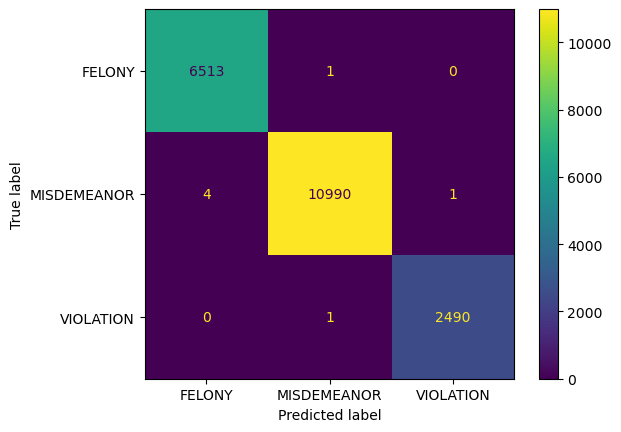

In [48]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred);

In [49]:
# ability to take user input and make a prediction

def preprocess_input(user_input, transformer):    
    input_df = pd.DataFrame([user_input])
    transformed_input = transformer.transform(input_df)
    return transformed_input

def predict_crime_severity(user_input, model, transformer):
    transformed_input = preprocess_input(user_input, transformer)
    predicted_severity = model.predict(transformed_input)
    return predicted_severity

user_input = {
    'KY_CD': 362,
    'VIC_AGE_GROUP': '25-44',
    'VIC_RACE': 'WHITE',
    'VIC_SEX': 'M',
    'SUSP_AGE_GROUP': '<18',
    'SUSP_RACE': 'BLACK',
    'SUSP_SEX': 'F',
}
predicted_severity = predict_crime_severity(user_input, model, transformer)
print("Predicted crime severity:", predicted_severity[0])

Predicted crime severity: MISDEMEANOR
